<a href="https://colab.research.google.com/github/JosephPLim/Project-Classification/blob/main/ProjectIIEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project II : Predicting Churn in Telephone Customers
##Student: Joseph Lim

This project aims to predict whether or not telephone customers will "churn" (leave) from a given phone company. The full dataset is [from Kaggle](https://www.kaggle.com/competitions/customer-churn-prediction-2020). Each row represents one customer, their data, and whether or not they churned. 

##Data Loading & Cleaning

###Import Libraries and File

In [1]:
#Basic Pandas and Numpy
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

#Classification Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
filename = "/content/drive/MyDrive/eLearning/CodingDojo - Data Science/Portfolio Projects/train.csv"
df = pd.read_csv(filename)

###Preliminary Data Cleaning

In [4]:
#Currently no columns that need to be removed
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [6]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
#Checking for inconsistencies in categorical values
for row in df:
  if df[row].dtypes == "object":
    print(df[row].value_counts())
    print("")

In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#Checking for missing values
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

##Exploratory Data Analyis (EDA)

In [55]:
#Showing column names
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

[Text(0, 0, 'OH'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'WY'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'ND')]

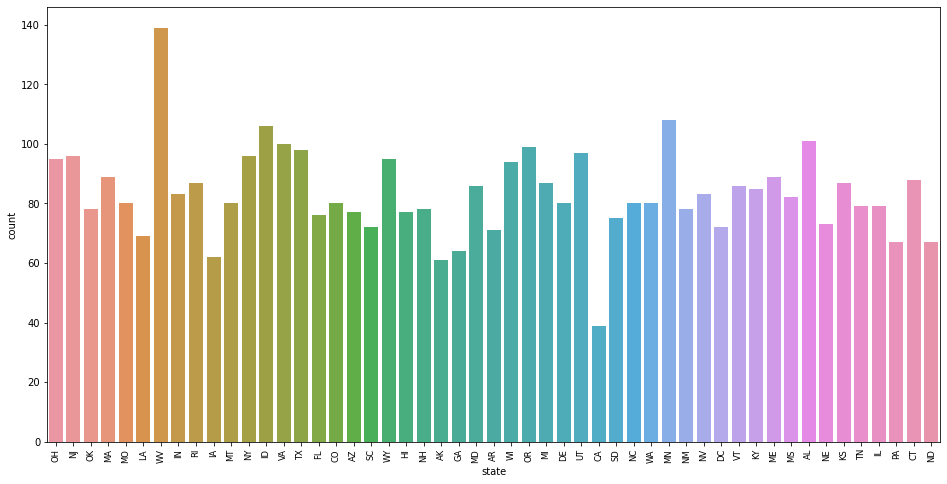

In [56]:
#Showing countplot of state column
plt.figure(figsize = (16,8))
state_plot = sns.countplot(x = df["state"])
xticklabels = state_plot.get_xticklabels()
state_plot.set_xticklabels(xticklabels, rotation=90, fontsize = "small")

#To Fix: sort the columns by alphabetical list, display by state. 
#Can we do a chloropleth? Maybe we can do it by state like in a map?

(array([125., 304., 651., 957., 968., 724., 340., 141.,  30.,  10.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 10 Patch objects>)

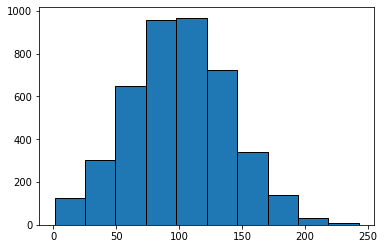

In [57]:
plt.hist(x = df["account_length"], edgecolor = "black")

#To Fix: we need to outline the histograms. 
#This is by month, so maybe we should separate them into every 12 months

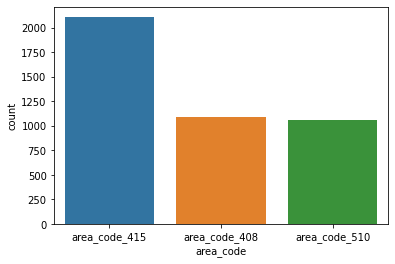

In [58]:
sns.countplot(x = df["area_code"])
#These are all area codes in the bay area. 
#How do I account for this?

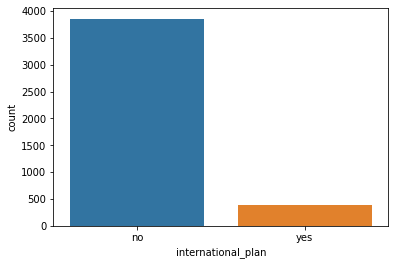

In [59]:
sns.countplot(x = df["international_plan"])
#Is there any way to make this less boring?

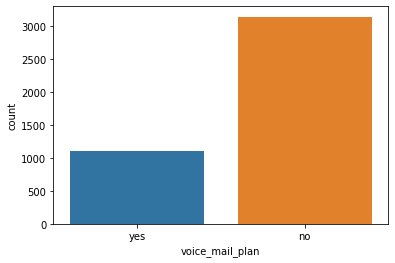

In [60]:
sns.countplot(x = df["voice_mail_plan"])
#Is there any way to make this less boring?

(array([3140.,    8.,   34.,  101.,  216.,  338.,  203.,  142.,   54.,
          14.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

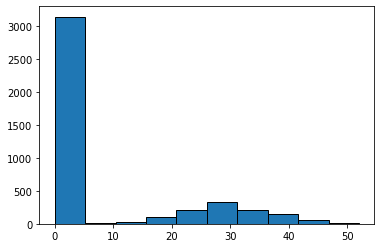

In [61]:
plt.hist(x = df["number_vmail_messages"], edgecolor = "black")

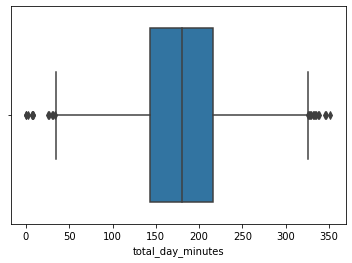

In [62]:
sns.boxplot(x='total_day_minutes', data=df)
#sns.countplot(x='total_day_minutes', data=df)

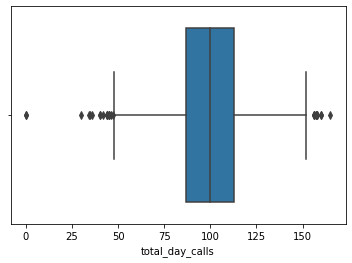

In [63]:
sns.boxplot(x = df["total_day_calls"])

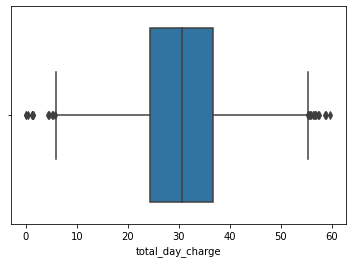

In [64]:
#plt.hist(x = df["total_day_charge"], edgecolor = "black")
sns.boxplot(x = df["total_day_charge"])

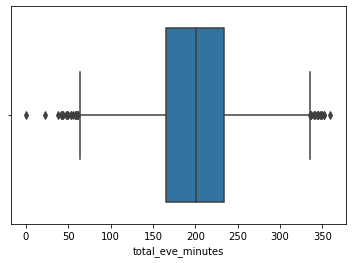

In [65]:
sns.boxplot(x = df["total_eve_minutes"])

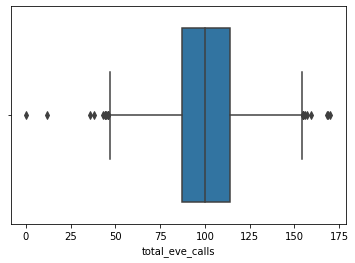

In [66]:
sns.boxplot(x = df["total_eve_calls"])

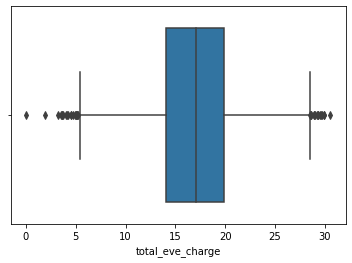

In [67]:
sns.boxplot(x = df["total_eve_charge"])

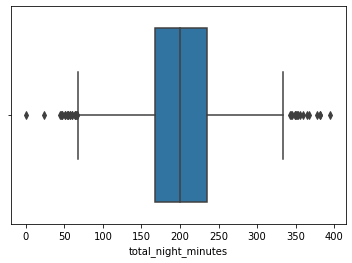

In [68]:
sns.boxplot(x = df["total_night_minutes"])

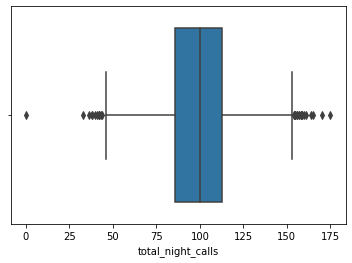

In [69]:
sns.boxplot(x = df["total_night_calls"])

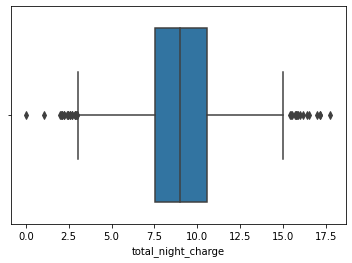

In [70]:
sns.boxplot(x = df["total_night_charge"])

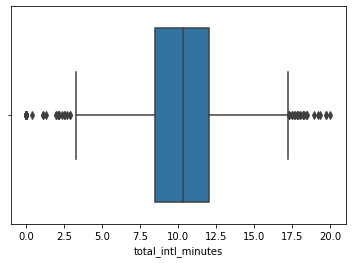

In [71]:
sns.boxplot(x = df["total_intl_minutes"])

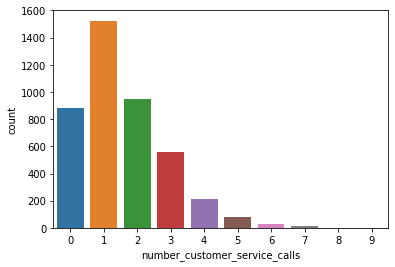

In [72]:
#plt.figure(figsize = (10,5))
sns.countplot(x = df["number_customer_service_calls"])

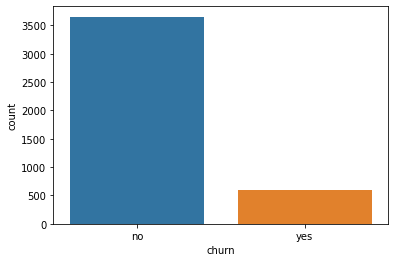

In [73]:
sns.countplot(x = df["churn"])

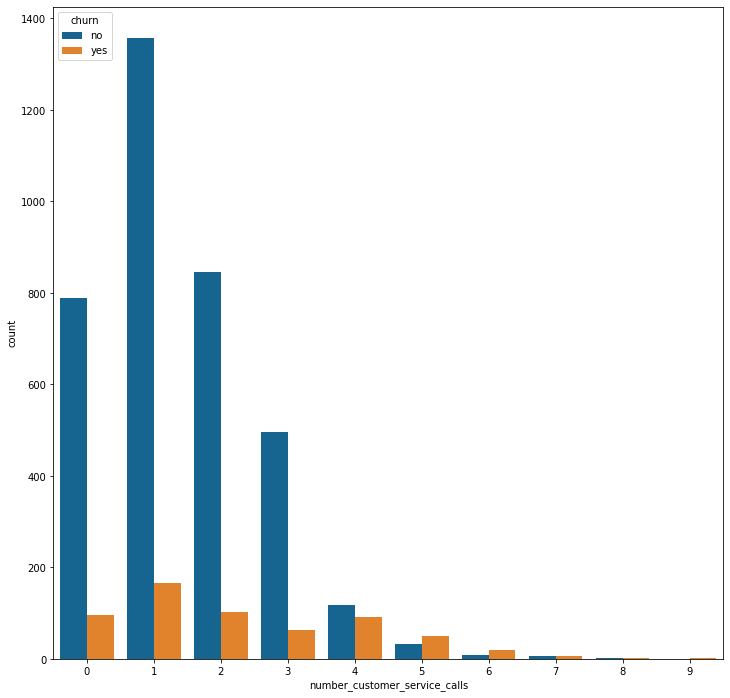

In [95]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(data = df, x = "number_customer_service_calls", hue = "churn")

## Explanatory Data Analysis

In [38]:
df_eda = df.copy()

In [42]:
df_eda["churn"] = df_eda["churn"].replace({"no": 0, "yes": 1})
df_eda["churn"] = df_eda["churn"].astype(int)

Text(0.5, 1.0, 'Correlations between numerical values')

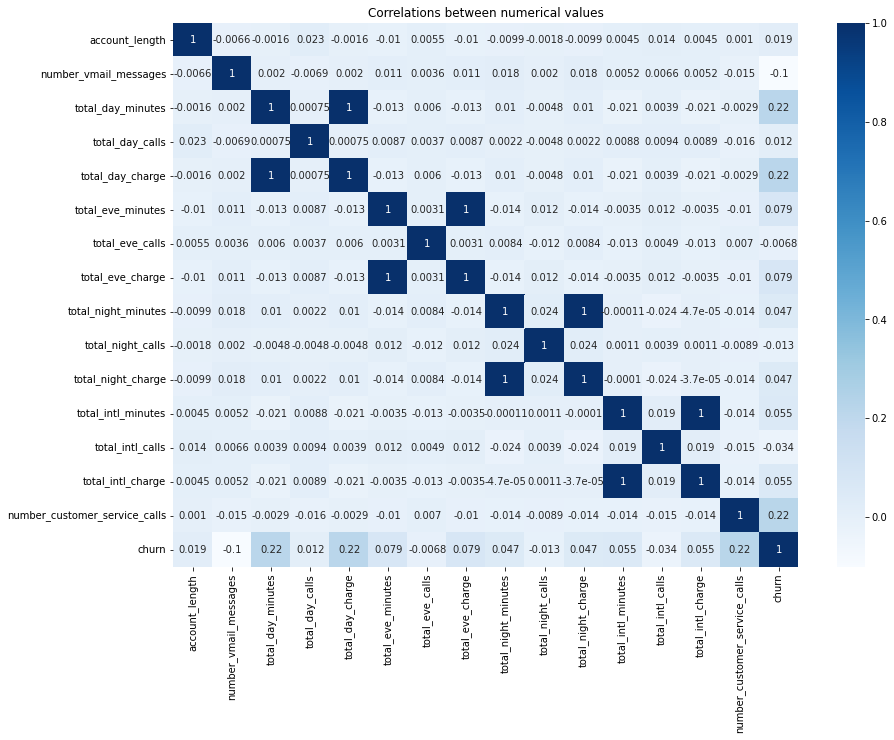

In [45]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(df_eda.corr(), cmap = 'Blues', annot = True, ax = ax)
plt.title("Correlations between numerical values")

From the heatmap, we can see that there seems to be a correlation between whether a customer churns, the number of customer service calls the customer makes, and the total charge/minutes the customer makes per day.

While there is a 1:1 correlation between certain variables, looking at the data dictionary shows that those correlations are between related variables (ex: # int'l minutes, and the charge for int'l minutes). There should be no need to show a 1:1 relationship like this.

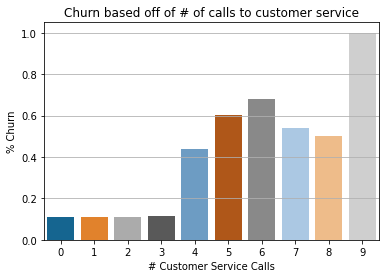

In [98]:
sns.barplot(data = df_eda, x = "number_customer_service_calls", y = "churn", ci = None)

plt.title("Churn based off of # of calls to customer service")
plt.xlabel("# Customer Service Calls")
plt.ylabel("% Churn")
plt.grid(axis = "y")

We can see that after 3 customer service calls, the percentage of people who churn rises by above 30%. We also see that at 9 customer service calls, customers absolutely churn.

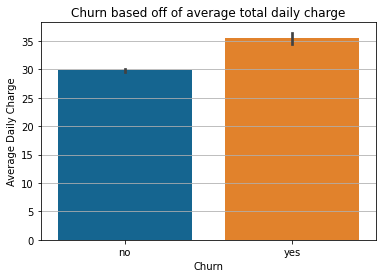

In [100]:
#Demonstrate the relationship between churn and total day charge

sns.barplot(data = df, x = "churn", y = "total_day_charge")

plt.title("Churn based off of average total daily charge")
plt.xlabel("Churn")
plt.ylabel("Average Daily Charge")
plt.grid(axis = "y")

We can see that on average, customers that churn tend to pay more than customers who do not churn.